# Primer modelo

# Imports

In [1]:
#Numpy & Pandas
import pandas as pd
import numpy as np

# Pandas options setting
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.float_format = '{:.3f}'.format

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import to_datetime
def week_to_date(d):
    import datetime   
    d = str(d)
    return datetime.datetime.strptime(d + '-1', "%Y-%W-%w")
#datetime
from datetime import datetime

#SARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
weekly_demand = pd.read_csv('data/weekly_demand.csv', delimiter=',')

In [3]:
weekly_demand.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.830,152.290,0,0,177
1,1466964,1,55,1993,136.830,135.830,0,0,270
2,1346989,1,55,2539,134.860,135.860,0,0,189
3,1338232,1,55,2139,339.500,437.530,0,0,54
4,1448490,1,55,2631,243.500,242.500,0,0,40


In [4]:
list_of_centers = list(weekly_demand .center_id.unique())

In [5]:
print(list_of_centers)

[55, 24, 11, 83, 32, 13, 109, 52, 93, 186, 146, 57, 149, 89, 124, 152, 97, 74, 108, 99, 66, 94, 91, 20, 34, 137, 92, 126, 36, 162, 75, 177, 27, 157, 106, 64, 129, 14, 17, 153, 139, 161, 81, 26, 73, 50, 104, 42, 113, 145, 53, 72, 67, 174, 29, 77, 41, 30, 76, 59, 88, 143, 58, 10, 101, 80, 43, 65, 39, 102, 110, 132, 23, 86, 68, 51, 61]


In [6]:
center_df_55= weekly_demand[weekly_demand['center_id'] ==55].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_24= weekly_demand[weekly_demand['center_id'] ==24].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_11= weekly_demand[weekly_demand['center_id'] ==11].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_83= weekly_demand[weekly_demand['center_id'] ==83].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_32= weekly_demand[weekly_demand['center_id'] ==32].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_13= weekly_demand[weekly_demand['center_id'] ==13].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_109= weekly_demand[weekly_demand['center_id'] ==109].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_52= weekly_demand[weekly_demand['center_id'] ==52].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_93= weekly_demand[weekly_demand['center_id'] ==93].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_186= weekly_demand[weekly_demand['center_id'] ==186].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_146= weekly_demand[weekly_demand['center_id'] ==146].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_57= weekly_demand[weekly_demand['center_id'] ==57].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_149= weekly_demand[weekly_demand['center_id'] ==149].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_89= weekly_demand[weekly_demand['center_id'] ==89].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_124= weekly_demand[weekly_demand['center_id'] ==124].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_152= weekly_demand[weekly_demand['center_id'] ==152].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_97= weekly_demand[weekly_demand['center_id'] ==97].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_74= weekly_demand[weekly_demand['center_id'] ==74].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_108= weekly_demand[weekly_demand['center_id'] ==108].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_99= weekly_demand[weekly_demand['center_id'] ==99].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_66= weekly_demand[weekly_demand['center_id'] ==66].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_94= weekly_demand[weekly_demand['center_id'] ==94].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_91= weekly_demand[weekly_demand['center_id'] ==91].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_20= weekly_demand[weekly_demand['center_id'] ==20].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_34= weekly_demand[weekly_demand['center_id'] ==34].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_137= weekly_demand[weekly_demand['center_id'] ==137].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_92= weekly_demand[weekly_demand['center_id'] ==92].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_126= weekly_demand[weekly_demand['center_id'] ==126].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_36= weekly_demand[weekly_demand['center_id'] ==36].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_162= weekly_demand[weekly_demand['center_id'] ==162].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_75= weekly_demand[weekly_demand['center_id'] ==75].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_177= weekly_demand[weekly_demand['center_id'] ==177].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_27= weekly_demand[weekly_demand['center_id'] ==27].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_157= weekly_demand[weekly_demand['center_id'] ==157].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_106= weekly_demand[weekly_demand['center_id'] ==106].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_64= weekly_demand[weekly_demand['center_id'] ==64].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_129= weekly_demand[weekly_demand['center_id'] ==129].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_14= weekly_demand[weekly_demand['center_id'] ==14].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_17= weekly_demand[weekly_demand['center_id'] ==17].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_153= weekly_demand[weekly_demand['center_id'] ==153].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_139= weekly_demand[weekly_demand['center_id'] ==139].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_161= weekly_demand[weekly_demand['center_id'] ==161].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_81= weekly_demand[weekly_demand['center_id'] ==81].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_26= weekly_demand[weekly_demand['center_id'] ==26].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_73= weekly_demand[weekly_demand['center_id'] ==73].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_50= weekly_demand[weekly_demand['center_id'] ==50].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_104= weekly_demand[weekly_demand['center_id'] ==104].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_42= weekly_demand[weekly_demand['center_id'] ==42].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_113= weekly_demand[weekly_demand['center_id'] ==113].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_145= weekly_demand[weekly_demand['center_id'] ==145].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_53= weekly_demand[weekly_demand['center_id'] ==53].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_72= weekly_demand[weekly_demand['center_id'] ==72].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_67= weekly_demand[weekly_demand['center_id'] ==67].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_174= weekly_demand[weekly_demand['center_id'] ==174].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_29= weekly_demand[weekly_demand['center_id'] ==29].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_77= weekly_demand[weekly_demand['center_id'] ==77].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_41= weekly_demand[weekly_demand['center_id'] ==41].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_30= weekly_demand[weekly_demand['center_id'] ==30].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_76= weekly_demand[weekly_demand['center_id'] ==76].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_59= weekly_demand[weekly_demand['center_id'] ==59].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_88= weekly_demand[weekly_demand['center_id'] ==88].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_143= weekly_demand[weekly_demand['center_id'] ==143].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_58= weekly_demand[weekly_demand['center_id'] ==58].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_10= weekly_demand[weekly_demand['center_id'] ==10].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_101= weekly_demand[weekly_demand['center_id'] ==101].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_80= weekly_demand[weekly_demand['center_id'] ==80].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_43= weekly_demand[weekly_demand['center_id'] ==43].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_65= weekly_demand[weekly_demand['center_id'] ==65].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_39= weekly_demand[weekly_demand['center_id'] ==39].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_102= weekly_demand[weekly_demand['center_id'] ==102].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_110= weekly_demand[weekly_demand['center_id'] ==110].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_132= weekly_demand[weekly_demand['center_id'] ==132].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_23= weekly_demand[weekly_demand['center_id'] ==23].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_86= weekly_demand[weekly_demand['center_id'] ==86].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_68= weekly_demand[weekly_demand['center_id'] ==68].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_51= weekly_demand[weekly_demand['center_id'] ==51].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()
center_df_61= weekly_demand[weekly_demand['center_id'] ==61].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()

In [7]:
center_df_55=center_df_55.reset_index()
center_df_24=center_df_24.reset_index()
center_df_11=center_df_11.reset_index()
center_df_83=center_df_83.reset_index()
center_df_32=center_df_32.reset_index()
center_df_13=center_df_13.reset_index()
center_df_109=center_df_109.reset_index()
center_df_52=center_df_52.reset_index()
center_df_93=center_df_93.reset_index()
center_df_186=center_df_186.reset_index()
center_df_146=center_df_146.reset_index()
center_df_57=center_df_57.reset_index()
center_df_149=center_df_149.reset_index()
center_df_89=center_df_89.reset_index()
center_df_124=center_df_124.reset_index()
center_df_152=center_df_152.reset_index()
center_df_97=center_df_97.reset_index()
center_df_74=center_df_74.reset_index()
center_df_108=center_df_108.reset_index()
center_df_99=center_df_99.reset_index()
center_df_66=center_df_66.reset_index()
center_df_94=center_df_94.reset_index()
center_df_91=center_df_91.reset_index()
center_df_20=center_df_20.reset_index()
center_df_34=center_df_34.reset_index()
center_df_137=center_df_137.reset_index()
center_df_92=center_df_92.reset_index()
center_df_126=center_df_126.reset_index()
center_df_36=center_df_36.reset_index()
center_df_162=center_df_162.reset_index()
center_df_75=center_df_75.reset_index()
center_df_177=center_df_177.reset_index()
center_df_27=center_df_27.reset_index()
center_df_157=center_df_157.reset_index()
center_df_106=center_df_106.reset_index()
center_df_64=center_df_64.reset_index()
center_df_129=center_df_129.reset_index()
center_df_14=center_df_14.reset_index()
center_df_17=center_df_17.reset_index()
center_df_153=center_df_153.reset_index()
center_df_139=center_df_139.reset_index()
center_df_161=center_df_161.reset_index()
center_df_81=center_df_81.reset_index()
center_df_26=center_df_26.reset_index()
center_df_73=center_df_73.reset_index()
center_df_50=center_df_50.reset_index()
center_df_104=center_df_104.reset_index()
center_df_42=center_df_42.reset_index()
center_df_113=center_df_113.reset_index()
center_df_145=center_df_145.reset_index()
center_df_53=center_df_53.reset_index()
center_df_72=center_df_72.reset_index()
center_df_67=center_df_67.reset_index()
center_df_174=center_df_174.reset_index()
center_df_29=center_df_29.reset_index()
center_df_77=center_df_77.reset_index()
center_df_41=center_df_41.reset_index()
center_df_30=center_df_30.reset_index()
center_df_76=center_df_76.reset_index()
center_df_59=center_df_59.reset_index()
center_df_88=center_df_88.reset_index()
center_df_143=center_df_143.reset_index()
center_df_58=center_df_58.reset_index()
center_df_10=center_df_10.reset_index()
center_df_101=center_df_101.reset_index()
center_df_80=center_df_80.reset_index()
center_df_43=center_df_43.reset_index()
center_df_65=center_df_65.reset_index()
center_df_39=center_df_39.reset_index()
center_df_102=center_df_102.reset_index()
center_df_110=center_df_110.reset_index()
center_df_132=center_df_132.reset_index()
center_df_23=center_df_23.reset_index()
center_df_86=center_df_86.reset_index()
center_df_68=center_df_68.reset_index()
center_df_51=center_df_51.reset_index()
center_df_61=center_df_61.reset_index()

In [8]:
center_df_55

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1,10967.900,11872.880,5,4,8382
1,2,10360.620,11269.390,6,4,6558
2,3,10476.990,11087.240,3,3,5005
3,4,11075.330,11580.820,0,3,6618
4,5,10158.560,11149.290,3,2,9138
5,6,10910.580,11851.570,0,2,6195
6,7,9504.960,10004.390,1,1,5624
7,8,8453.390,9131.570,0,1,3432
8,9,10697.120,11761.210,2,0,5445
9,10,11036.680,12015.440,5,1,5633


In [9]:
def convert_week_ts(mum_week):
    if mum_week <= 52:
        return f'2020-{mum_week}'
    elif 52 < mum_week <= 104:
         return f'2021-{mum_week-52}'
    else:
        return f'2022-{mum_week-104}'

In [10]:
center_df_55['year_week_ts'] = center_df_55['week'].apply(convert_week_ts)
center_df_24['year_week_ts'] = center_df_24['week'].apply(convert_week_ts)
center_df_11['year_week_ts'] = center_df_11['week'].apply(convert_week_ts)
center_df_83['year_week_ts'] = center_df_83['week'].apply(convert_week_ts)
center_df_32['year_week_ts'] = center_df_32['week'].apply(convert_week_ts)
center_df_13['year_week_ts'] = center_df_13['week'].apply(convert_week_ts)
center_df_109['year_week_ts'] = center_df_109['week'].apply(convert_week_ts)
center_df_52['year_week_ts'] = center_df_52['week'].apply(convert_week_ts)
center_df_93['year_week_ts'] = center_df_93['week'].apply(convert_week_ts)
center_df_186['year_week_ts'] = center_df_186['week'].apply(convert_week_ts)
center_df_146['year_week_ts'] = center_df_146['week'].apply(convert_week_ts)
center_df_57['year_week_ts'] = center_df_57['week'].apply(convert_week_ts)
center_df_149['year_week_ts'] = center_df_149['week'].apply(convert_week_ts)
center_df_89['year_week_ts'] = center_df_89['week'].apply(convert_week_ts)
center_df_124['year_week_ts'] = center_df_124['week'].apply(convert_week_ts)
center_df_152['year_week_ts'] = center_df_152['week'].apply(convert_week_ts)
center_df_97['year_week_ts'] = center_df_97['week'].apply(convert_week_ts)
center_df_74['year_week_ts'] = center_df_74['week'].apply(convert_week_ts)
center_df_108['year_week_ts'] = center_df_108['week'].apply(convert_week_ts)
center_df_99['year_week_ts'] = center_df_99['week'].apply(convert_week_ts)
center_df_66['year_week_ts'] = center_df_66['week'].apply(convert_week_ts)
center_df_94['year_week_ts'] = center_df_94['week'].apply(convert_week_ts)
center_df_91['year_week_ts'] = center_df_91['week'].apply(convert_week_ts)
center_df_20['year_week_ts'] = center_df_20['week'].apply(convert_week_ts)
center_df_34['year_week_ts'] = center_df_34['week'].apply(convert_week_ts)
center_df_137['year_week_ts'] = center_df_137['week'].apply(convert_week_ts)
center_df_92['year_week_ts'] = center_df_92['week'].apply(convert_week_ts)
center_df_126['year_week_ts'] = center_df_126['week'].apply(convert_week_ts)
center_df_36['year_week_ts'] = center_df_36['week'].apply(convert_week_ts)
center_df_162['year_week_ts'] = center_df_162['week'].apply(convert_week_ts)
center_df_75['year_week_ts'] = center_df_75['week'].apply(convert_week_ts)
center_df_177['year_week_ts'] = center_df_177['week'].apply(convert_week_ts)
center_df_27['year_week_ts'] = center_df_27['week'].apply(convert_week_ts)
center_df_157['year_week_ts'] = center_df_157['week'].apply(convert_week_ts)
center_df_106['year_week_ts'] = center_df_106['week'].apply(convert_week_ts)
center_df_64['year_week_ts'] = center_df_64['week'].apply(convert_week_ts)
center_df_129['year_week_ts'] = center_df_129['week'].apply(convert_week_ts)
center_df_14['year_week_ts'] = center_df_14['week'].apply(convert_week_ts)
center_df_17['year_week_ts'] = center_df_17['week'].apply(convert_week_ts)
center_df_153['year_week_ts'] = center_df_153['week'].apply(convert_week_ts)
center_df_139['year_week_ts'] = center_df_139['week'].apply(convert_week_ts)
center_df_161['year_week_ts'] = center_df_161['week'].apply(convert_week_ts)
center_df_81['year_week_ts'] = center_df_81['week'].apply(convert_week_ts)
center_df_26['year_week_ts'] = center_df_26['week'].apply(convert_week_ts)
center_df_73['year_week_ts'] = center_df_73['week'].apply(convert_week_ts)
center_df_50['year_week_ts'] = center_df_50['week'].apply(convert_week_ts)
center_df_104['year_week_ts'] = center_df_104['week'].apply(convert_week_ts)
center_df_42['year_week_ts'] = center_df_42['week'].apply(convert_week_ts)
center_df_113['year_week_ts'] = center_df_113['week'].apply(convert_week_ts)
center_df_145['year_week_ts'] = center_df_145['week'].apply(convert_week_ts)
center_df_53['year_week_ts'] = center_df_53['week'].apply(convert_week_ts)
center_df_72['year_week_ts'] = center_df_72['week'].apply(convert_week_ts)
center_df_67['year_week_ts'] = center_df_67['week'].apply(convert_week_ts)
center_df_174['year_week_ts'] = center_df_174['week'].apply(convert_week_ts)
center_df_29['year_week_ts'] = center_df_29['week'].apply(convert_week_ts)
center_df_77['year_week_ts'] = center_df_77['week'].apply(convert_week_ts)
center_df_41['year_week_ts'] = center_df_41['week'].apply(convert_week_ts)
center_df_30['year_week_ts'] = center_df_30['week'].apply(convert_week_ts)
center_df_76['year_week_ts'] = center_df_76['week'].apply(convert_week_ts)
center_df_59['year_week_ts'] = center_df_59['week'].apply(convert_week_ts)
center_df_88['year_week_ts'] = center_df_88['week'].apply(convert_week_ts)
center_df_143['year_week_ts'] = center_df_143['week'].apply(convert_week_ts)
center_df_58['year_week_ts'] = center_df_58['week'].apply(convert_week_ts)
center_df_10['year_week_ts'] = center_df_10['week'].apply(convert_week_ts)
center_df_101['year_week_ts'] = center_df_101['week'].apply(convert_week_ts)
center_df_80['year_week_ts'] = center_df_80['week'].apply(convert_week_ts)
center_df_43['year_week_ts'] = center_df_43['week'].apply(convert_week_ts)
center_df_65['year_week_ts'] = center_df_65['week'].apply(convert_week_ts)
center_df_39['year_week_ts'] = center_df_39['week'].apply(convert_week_ts)
center_df_102['year_week_ts'] = center_df_102['week'].apply(convert_week_ts)
center_df_110['year_week_ts'] = center_df_110['week'].apply(convert_week_ts)
center_df_132['year_week_ts'] = center_df_132['week'].apply(convert_week_ts)
center_df_23['year_week_ts'] = center_df_23['week'].apply(convert_week_ts)
center_df_86['year_week_ts'] = center_df_86['week'].apply(convert_week_ts)
center_df_68['year_week_ts'] = center_df_68['week'].apply(convert_week_ts)
center_df_51['year_week_ts'] = center_df_51['week'].apply(convert_week_ts)
center_df_61['year_week_ts'] = center_df_61['week'].apply(convert_week_ts)


In [11]:
center_df_51.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,year_week_ts
0,1,14651.350,15803.440,5,6,17025,2020-1
1,2,13823.000,15249.720,6,8,14290,2020-2
2,3,12775.040,14164.260,3,6,12663,2020-3
3,4,14157.470,15416.650,0,10,14007,2020-4
4,5,13740.610,15428.200,4,10,25915,2020-5


In [12]:
df_55_ts = center_df_55[['year_week_ts',  'num_orders']]
df_24_ts = center_df_24[['year_week_ts',  'num_orders']]
df_11_ts = center_df_11[['year_week_ts',  'num_orders']]
df_83_ts = center_df_83[['year_week_ts',  'num_orders']]
df_32_ts = center_df_32[['year_week_ts',  'num_orders']]
df_13_ts = center_df_13[['year_week_ts',  'num_orders']]
df_109_ts = center_df_109[['year_week_ts',  'num_orders']]
df_52_ts = center_df_52[['year_week_ts',  'num_orders']]
df_93_ts = center_df_93[['year_week_ts',  'num_orders']]
df_186_ts = center_df_186[['year_week_ts',  'num_orders']]
df_146_ts = center_df_146[['year_week_ts',  'num_orders']]
df_57_ts = center_df_57[['year_week_ts',  'num_orders']]
df_149_ts = center_df_149[['year_week_ts',  'num_orders']]
df_89_ts = center_df_89[['year_week_ts',  'num_orders']]
df_124_ts = center_df_124[['year_week_ts',  'num_orders']]
df_152_ts = center_df_152[['year_week_ts',  'num_orders']]
df_97_ts = center_df_97[['year_week_ts',  'num_orders']]
df_74_ts = center_df_74[['year_week_ts',  'num_orders']]
df_108_ts = center_df_108[['year_week_ts',  'num_orders']]
df_99_ts = center_df_99[['year_week_ts',  'num_orders']]
df_66_ts = center_df_66[['year_week_ts',  'num_orders']]
df_94_ts = center_df_94[['year_week_ts',  'num_orders']]
df_91_ts = center_df_91[['year_week_ts',  'num_orders']]
df_20_ts = center_df_20[['year_week_ts',  'num_orders']]
df_34_ts = center_df_34[['year_week_ts',  'num_orders']]
df_137_ts = center_df_137[['year_week_ts',  'num_orders']]
df_92_ts = center_df_92[['year_week_ts',  'num_orders']]
df_126_ts = center_df_126[['year_week_ts',  'num_orders']]
df_36_ts = center_df_36[['year_week_ts',  'num_orders']]
df_162_ts = center_df_162[['year_week_ts',  'num_orders']]
df_75_ts = center_df_75[['year_week_ts',  'num_orders']]
df_177_ts = center_df_177[['year_week_ts',  'num_orders']]
df_27_ts = center_df_27[['year_week_ts',  'num_orders']]
df_157_ts = center_df_157[['year_week_ts',  'num_orders']]
df_106_ts = center_df_106[['year_week_ts',  'num_orders']]
df_64_ts = center_df_64[['year_week_ts',  'num_orders']]
df_129_ts = center_df_129[['year_week_ts',  'num_orders']]
df_14_ts = center_df_14[['year_week_ts',  'num_orders']]
df_17_ts = center_df_17[['year_week_ts',  'num_orders']]
df_153_ts = center_df_153[['year_week_ts',  'num_orders']]
df_139_ts = center_df_139[['year_week_ts',  'num_orders']]
df_161_ts = center_df_161[['year_week_ts',  'num_orders']]
df_81_ts = center_df_81[['year_week_ts',  'num_orders']]
df_26_ts = center_df_26[['year_week_ts',  'num_orders']]
df_73_ts = center_df_73[['year_week_ts',  'num_orders']]
df_50_ts = center_df_50[['year_week_ts',  'num_orders']]
df_104_ts = center_df_104[['year_week_ts',  'num_orders']]
df_42_ts = center_df_42[['year_week_ts',  'num_orders']]
df_113_ts = center_df_113[['year_week_ts',  'num_orders']]
df_145_ts = center_df_145[['year_week_ts',  'num_orders']]
df_53_ts = center_df_53[['year_week_ts',  'num_orders']]
df_72_ts = center_df_72[['year_week_ts',  'num_orders']]
df_67_ts = center_df_67[['year_week_ts',  'num_orders']]
df_174_ts = center_df_174[['year_week_ts',  'num_orders']]
df_29_ts = center_df_29[['year_week_ts',  'num_orders']]
df_77_ts = center_df_77[['year_week_ts',  'num_orders']]
df_41_ts = center_df_41[['year_week_ts',  'num_orders']]
df_30_ts = center_df_30[['year_week_ts',  'num_orders']]
df_76_ts = center_df_76[['year_week_ts',  'num_orders']]
df_59_ts = center_df_59[['year_week_ts',  'num_orders']]
df_88_ts = center_df_88[['year_week_ts',  'num_orders']]
df_143_ts = center_df_143[['year_week_ts',  'num_orders']]
df_58_ts = center_df_58[['year_week_ts',  'num_orders']]
df_10_ts = center_df_10[['year_week_ts',  'num_orders']]
df_101_ts = center_df_101[['year_week_ts',  'num_orders']]
df_80_ts = center_df_80[['year_week_ts',  'num_orders']]
df_43_ts = center_df_43[['year_week_ts',  'num_orders']]
df_65_ts = center_df_65[['year_week_ts',  'num_orders']]
df_39_ts = center_df_39[['year_week_ts',  'num_orders']]
df_102_ts = center_df_102[['year_week_ts',  'num_orders']]
df_110_ts = center_df_110[['year_week_ts',  'num_orders']]
df_132_ts = center_df_132[['year_week_ts',  'num_orders']]
df_23_ts = center_df_23[['year_week_ts',  'num_orders']]
df_86_ts = center_df_86[['year_week_ts',  'num_orders']]
df_68_ts = center_df_68[['year_week_ts',  'num_orders']]
df_51_ts = center_df_51[['year_week_ts',  'num_orders']]
df_61_ts = center_df_61[['year_week_ts',  'num_orders']]

In [13]:
df_55_ts

,year_week_ts,num_orders
0,2020-1,8382
1,2020-2,6558
2,2020-3,5005
3,2020-4,6618
4,2020-5,9138
5,2020-6,6195
6,2020-7,5624
7,2020-8,3432
8,2020-9,5445
9,2020-10,5633


In [14]:
df_61_ts

,year_week_ts,num_orders
0,2020-1,6937
1,2020-2,7154
2,2020-3,7071
3,2020-4,6105
4,2020-5,12576
5,2020-6,10485
6,2020-7,10549
7,2020-8,8534
8,2020-9,6639
9,2020-10,8226


In [15]:
def week_to_date(d):  
    import datetime
    d = str(d)
    return datetime.datetime.strptime(d + '-1', "%Y-%W-%w")

In [16]:
df_55_ts['fecha'] =df_55_ts ['year_week_ts'].apply(week_to_date)
df_24_ts['fecha'] =df_24_ts ['year_week_ts'].apply(week_to_date)
df_11_ts['fecha'] =df_11_ts ['year_week_ts'].apply(week_to_date)
df_83_ts['fecha'] =df_83_ts ['year_week_ts'].apply(week_to_date)
df_32_ts['fecha'] =df_32_ts ['year_week_ts'].apply(week_to_date)
df_13_ts['fecha'] =df_13_ts ['year_week_ts'].apply(week_to_date)
df_109_ts['fecha'] =df_109_ts ['year_week_ts'].apply(week_to_date)
df_52_ts['fecha'] =df_52_ts ['year_week_ts'].apply(week_to_date)
df_93_ts['fecha'] =df_93_ts ['year_week_ts'].apply(week_to_date)
df_186_ts['fecha'] =df_186_ts ['year_week_ts'].apply(week_to_date)
df_146_ts['fecha'] =df_146_ts ['year_week_ts'].apply(week_to_date)
df_57_ts['fecha'] =df_57_ts ['year_week_ts'].apply(week_to_date)
df_149_ts['fecha'] =df_149_ts ['year_week_ts'].apply(week_to_date)
df_89_ts['fecha'] =df_89_ts ['year_week_ts'].apply(week_to_date)
df_124_ts['fecha'] =df_124_ts ['year_week_ts'].apply(week_to_date)
df_152_ts['fecha'] =df_152_ts ['year_week_ts'].apply(week_to_date)
df_97_ts['fecha'] =df_97_ts ['year_week_ts'].apply(week_to_date)
df_74_ts['fecha'] =df_74_ts ['year_week_ts'].apply(week_to_date)
df_108_ts['fecha'] =df_108_ts ['year_week_ts'].apply(week_to_date)
df_99_ts['fecha'] =df_99_ts ['year_week_ts'].apply(week_to_date)
df_66_ts['fecha'] =df_66_ts ['year_week_ts'].apply(week_to_date)
df_94_ts['fecha'] =df_94_ts ['year_week_ts'].apply(week_to_date)
df_91_ts['fecha'] =df_91_ts ['year_week_ts'].apply(week_to_date)
df_20_ts['fecha'] =df_20_ts ['year_week_ts'].apply(week_to_date)
df_34_ts['fecha'] =df_34_ts ['year_week_ts'].apply(week_to_date)
df_137_ts['fecha'] =df_137_ts ['year_week_ts'].apply(week_to_date)
df_92_ts['fecha'] =df_92_ts ['year_week_ts'].apply(week_to_date)
df_126_ts['fecha'] =df_126_ts ['year_week_ts'].apply(week_to_date)
df_36_ts['fecha'] =df_36_ts ['year_week_ts'].apply(week_to_date)
df_162_ts['fecha'] =df_162_ts ['year_week_ts'].apply(week_to_date)
df_75_ts['fecha'] =df_75_ts ['year_week_ts'].apply(week_to_date)
df_177_ts['fecha'] =df_177_ts ['year_week_ts'].apply(week_to_date)
df_27_ts['fecha'] =df_27_ts ['year_week_ts'].apply(week_to_date)
df_157_ts['fecha'] =df_157_ts ['year_week_ts'].apply(week_to_date)
df_106_ts['fecha'] =df_106_ts ['year_week_ts'].apply(week_to_date)
df_64_ts['fecha'] =df_64_ts ['year_week_ts'].apply(week_to_date)
df_129_ts['fecha'] =df_129_ts ['year_week_ts'].apply(week_to_date)
df_14_ts['fecha'] =df_14_ts ['year_week_ts'].apply(week_to_date)
df_17_ts['fecha'] =df_17_ts ['year_week_ts'].apply(week_to_date)
df_153_ts['fecha'] =df_153_ts ['year_week_ts'].apply(week_to_date)
df_139_ts['fecha'] =df_139_ts ['year_week_ts'].apply(week_to_date)
df_161_ts['fecha'] =df_161_ts ['year_week_ts'].apply(week_to_date)
df_81_ts['fecha'] =df_81_ts ['year_week_ts'].apply(week_to_date)
df_26_ts['fecha'] =df_26_ts ['year_week_ts'].apply(week_to_date)
df_73_ts['fecha'] =df_73_ts ['year_week_ts'].apply(week_to_date)
df_50_ts['fecha'] =df_50_ts ['year_week_ts'].apply(week_to_date)
df_104_ts['fecha'] =df_104_ts ['year_week_ts'].apply(week_to_date)
df_42_ts['fecha'] =df_42_ts ['year_week_ts'].apply(week_to_date)
df_113_ts['fecha'] =df_113_ts ['year_week_ts'].apply(week_to_date)
df_145_ts['fecha'] =df_145_ts ['year_week_ts'].apply(week_to_date)
df_53_ts['fecha'] =df_53_ts ['year_week_ts'].apply(week_to_date)
df_72_ts['fecha'] =df_72_ts ['year_week_ts'].apply(week_to_date)
df_67_ts['fecha'] =df_67_ts ['year_week_ts'].apply(week_to_date)
df_174_ts['fecha'] =df_174_ts ['year_week_ts'].apply(week_to_date)
df_29_ts['fecha'] =df_29_ts ['year_week_ts'].apply(week_to_date)
df_77_ts['fecha'] =df_77_ts ['year_week_ts'].apply(week_to_date)
df_41_ts['fecha'] =df_41_ts ['year_week_ts'].apply(week_to_date)
df_30_ts['fecha'] =df_30_ts ['year_week_ts'].apply(week_to_date)
df_76_ts['fecha'] =df_76_ts ['year_week_ts'].apply(week_to_date)
df_59_ts['fecha'] =df_59_ts ['year_week_ts'].apply(week_to_date)
df_88_ts['fecha'] =df_88_ts ['year_week_ts'].apply(week_to_date)
df_143_ts['fecha'] =df_143_ts ['year_week_ts'].apply(week_to_date)
df_58_ts['fecha'] =df_58_ts ['year_week_ts'].apply(week_to_date)
df_10_ts['fecha'] =df_10_ts ['year_week_ts'].apply(week_to_date)
df_101_ts['fecha'] =df_101_ts ['year_week_ts'].apply(week_to_date)
df_80_ts['fecha'] =df_80_ts ['year_week_ts'].apply(week_to_date)
df_43_ts['fecha'] =df_43_ts ['year_week_ts'].apply(week_to_date)
df_65_ts['fecha'] =df_65_ts ['year_week_ts'].apply(week_to_date)
df_39_ts['fecha'] =df_39_ts ['year_week_ts'].apply(week_to_date)
df_102_ts['fecha'] =df_102_ts ['year_week_ts'].apply(week_to_date)
df_110_ts['fecha'] =df_110_ts ['year_week_ts'].apply(week_to_date)
df_132_ts['fecha'] =df_132_ts ['year_week_ts'].apply(week_to_date)
df_23_ts['fecha'] =df_23_ts ['year_week_ts'].apply(week_to_date)
df_86_ts['fecha'] =df_86_ts ['year_week_ts'].apply(week_to_date)
df_68_ts['fecha'] =df_68_ts ['year_week_ts'].apply(week_to_date)
df_51_ts['fecha'] =df_51_ts ['year_week_ts'].apply(week_to_date)
df_61_ts['fecha'] =df_61_ts ['year_week_ts'].apply(week_to_date)

/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_55_ts['fecha'] =df_55_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_ts['fecha'] =df_24_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:3: SettingWithCopyWarning: 
A value is trying to be s

/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_99_ts['fecha'] =df_99_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_66_ts['fecha'] =df_66_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:22: SettingWithCopyWarning: 
A value is trying to b

/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_139_ts['fecha'] =df_139_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_161_ts['fecha'] =df_161_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:43: SettingWithCopyWarning: 
A value is trying 

/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_143_ts['fecha'] =df_143_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_58_ts['fecha'] =df_58_ts ['year_week_ts'].apply(week_to_date)
/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/659950464.py:64: SettingWithCopyWarning: 
A value is trying to

In [17]:
df_61_ts.head()

,year_week_ts,num_orders,fecha
0,2020-1,6937,2020-01-06
1,2020-2,7154,2020-01-13
2,2020-3,7071,2020-01-20
3,2020-4,6105,2020-01-27
4,2020-5,12576,2020-02-03


In [18]:
df_55_ts=df_55_ts.drop('year_week_ts',  axis=1)
df_24_ts=df_24_ts.drop('year_week_ts',  axis=1)
df_11_ts=df_11_ts.drop('year_week_ts',  axis=1)
df_83_ts=df_83_ts.drop('year_week_ts',  axis=1)
df_32_ts=df_32_ts.drop('year_week_ts',  axis=1)
df_13_ts=df_13_ts.drop('year_week_ts',  axis=1)
df_109_ts=df_109_ts.drop('year_week_ts',  axis=1)
df_52_ts=df_52_ts.drop('year_week_ts',  axis=1)
df_93_ts=df_93_ts.drop('year_week_ts',  axis=1)
df_186_ts=df_186_ts.drop('year_week_ts',  axis=1)
df_146_ts=df_146_ts.drop('year_week_ts',  axis=1)
df_57_ts=df_57_ts.drop('year_week_ts',  axis=1)
df_149_ts=df_149_ts.drop('year_week_ts',  axis=1)
df_89_ts=df_89_ts.drop('year_week_ts',  axis=1)
df_124_ts=df_124_ts.drop('year_week_ts',  axis=1)
df_152_ts=df_152_ts.drop('year_week_ts',  axis=1)
df_97_ts=df_97_ts.drop('year_week_ts',  axis=1)
df_74_ts=df_74_ts.drop('year_week_ts',  axis=1)
df_108_ts=df_108_ts.drop('year_week_ts',  axis=1)
df_99_ts=df_99_ts.drop('year_week_ts',  axis=1)
df_66_ts=df_66_ts.drop('year_week_ts',  axis=1)
df_94_ts=df_94_ts.drop('year_week_ts',  axis=1)
df_91_ts=df_91_ts.drop('year_week_ts',  axis=1)
df_20_ts=df_20_ts.drop('year_week_ts',  axis=1)
df_34_ts=df_34_ts.drop('year_week_ts',  axis=1)
df_137_ts=df_137_ts.drop('year_week_ts',  axis=1)
df_92_ts=df_92_ts.drop('year_week_ts',  axis=1)
df_126_ts=df_126_ts.drop('year_week_ts',  axis=1)
df_36_ts=df_36_ts.drop('year_week_ts',  axis=1)
df_162_ts=df_162_ts.drop('year_week_ts',  axis=1)
df_75_ts=df_75_ts.drop('year_week_ts',  axis=1)
df_177_ts=df_177_ts.drop('year_week_ts',  axis=1)
df_27_ts=df_27_ts.drop('year_week_ts',  axis=1)
df_157_ts=df_157_ts.drop('year_week_ts',  axis=1)
df_106_ts=df_106_ts.drop('year_week_ts',  axis=1)
df_64_ts=df_64_ts.drop('year_week_ts',  axis=1)
df_129_ts=df_129_ts.drop('year_week_ts',  axis=1)
df_14_ts=df_14_ts.drop('year_week_ts',  axis=1)
df_17_ts=df_17_ts.drop('year_week_ts',  axis=1)
df_153_ts=df_153_ts.drop('year_week_ts',  axis=1)
df_139_ts=df_139_ts.drop('year_week_ts',  axis=1)
df_161_ts=df_161_ts.drop('year_week_ts',  axis=1)
df_81_ts=df_81_ts.drop('year_week_ts',  axis=1)
df_26_ts=df_26_ts.drop('year_week_ts',  axis=1)
df_73_ts=df_73_ts.drop('year_week_ts',  axis=1)
df_50_ts=df_50_ts.drop('year_week_ts',  axis=1)
df_104_ts=df_104_ts.drop('year_week_ts',  axis=1)
df_42_ts=df_42_ts.drop('year_week_ts',  axis=1)
df_113_ts=df_113_ts.drop('year_week_ts',  axis=1)
df_145_ts=df_145_ts.drop('year_week_ts',  axis=1)
df_53_ts=df_53_ts.drop('year_week_ts',  axis=1)
df_72_ts=df_72_ts.drop('year_week_ts',  axis=1)
df_67_ts=df_67_ts.drop('year_week_ts',  axis=1)
df_174_ts=df_174_ts.drop('year_week_ts',  axis=1)
df_29_ts=df_29_ts.drop('year_week_ts',  axis=1)
df_77_ts=df_77_ts.drop('year_week_ts',  axis=1)
df_41_ts=df_41_ts.drop('year_week_ts',  axis=1)
df_30_ts=df_30_ts.drop('year_week_ts',  axis=1)
df_76_ts=df_76_ts.drop('year_week_ts',  axis=1)
df_59_ts=df_59_ts.drop('year_week_ts',  axis=1)
df_88_ts=df_88_ts.drop('year_week_ts',  axis=1)
df_143_ts=df_143_ts.drop('year_week_ts',  axis=1)
df_58_ts=df_58_ts.drop('year_week_ts',  axis=1)
df_10_ts=df_10_ts.drop('year_week_ts',  axis=1)
df_101_ts=df_101_ts.drop('year_week_ts',  axis=1)
df_80_ts=df_80_ts.drop('year_week_ts',  axis=1)
df_43_ts=df_43_ts.drop('year_week_ts',  axis=1)
df_65_ts=df_65_ts.drop('year_week_ts',  axis=1)
df_39_ts=df_39_ts.drop('year_week_ts',  axis=1)
df_102_ts=df_102_ts.drop('year_week_ts',  axis=1)
df_110_ts=df_110_ts.drop('year_week_ts',  axis=1)
df_132_ts=df_132_ts.drop('year_week_ts',  axis=1)
df_23_ts=df_23_ts.drop('year_week_ts',  axis=1)
df_86_ts=df_86_ts.drop('year_week_ts',  axis=1)
df_68_ts=df_68_ts.drop('year_week_ts',  axis=1)
df_51_ts=df_51_ts.drop('year_week_ts',  axis=1)
df_61_ts=df_61_ts.drop('year_week_ts',  axis=1)

In [19]:
df_61_ts

,num_orders,fecha
0,6937,2020-01-06
1,7154,2020-01-13
2,7071,2020-01-20
3,6105,2020-01-27
4,12576,2020-02-03
5,10485,2020-02-10
6,10549,2020-02-17
7,8534,2020-02-24
8,6639,2020-03-02
9,8226,2020-03-09


In [20]:
df_55_ts=df_55_ts.set_index('fecha')
df_24_ts=df_24_ts.set_index('fecha')
df_11_ts=df_11_ts.set_index('fecha')
df_83_ts=df_83_ts.set_index('fecha')
df_32_ts=df_32_ts.set_index('fecha')
df_13_ts=df_13_ts.set_index('fecha')
df_109_ts=df_109_ts.set_index('fecha')
df_52_ts=df_52_ts.set_index('fecha')
df_93_ts=df_93_ts.set_index('fecha')
df_186_ts=df_186_ts.set_index('fecha')
df_146_ts=df_146_ts.set_index('fecha')
df_57_ts=df_57_ts.set_index('fecha')
df_149_ts=df_149_ts.set_index('fecha')
df_89_ts=df_89_ts.set_index('fecha')
df_124_ts=df_124_ts.set_index('fecha')
df_152_ts=df_152_ts.set_index('fecha')
df_97_ts=df_97_ts.set_index('fecha')
df_74_ts=df_74_ts.set_index('fecha')
df_108_ts=df_108_ts.set_index('fecha')
df_99_ts=df_99_ts.set_index('fecha')
df_66_ts=df_66_ts.set_index('fecha')
df_94_ts=df_94_ts.set_index('fecha')
df_91_ts=df_91_ts.set_index('fecha')
df_20_ts=df_20_ts.set_index('fecha')
df_34_ts=df_34_ts.set_index('fecha')
df_137_ts=df_137_ts.set_index('fecha')
df_92_ts=df_92_ts.set_index('fecha')
df_126_ts=df_126_ts.set_index('fecha')
df_36_ts=df_36_ts.set_index('fecha')
df_162_ts=df_162_ts.set_index('fecha')
df_75_ts=df_75_ts.set_index('fecha')
df_177_ts=df_177_ts.set_index('fecha')
df_27_ts=df_27_ts.set_index('fecha')
df_157_ts=df_157_ts.set_index('fecha')
df_106_ts=df_106_ts.set_index('fecha')
df_64_ts=df_64_ts.set_index('fecha')
df_129_ts=df_129_ts.set_index('fecha')
df_14_ts=df_14_ts.set_index('fecha')
df_17_ts=df_17_ts.set_index('fecha')
df_153_ts=df_153_ts.set_index('fecha')
df_139_ts=df_139_ts.set_index('fecha')
df_161_ts=df_161_ts.set_index('fecha')
df_81_ts=df_81_ts.set_index('fecha')
df_26_ts=df_26_ts.set_index('fecha')
df_73_ts=df_73_ts.set_index('fecha')
df_50_ts=df_50_ts.set_index('fecha')
df_104_ts=df_104_ts.set_index('fecha')
df_42_ts=df_42_ts.set_index('fecha')
df_113_ts=df_113_ts.set_index('fecha')
df_145_ts=df_145_ts.set_index('fecha')
df_53_ts=df_53_ts.set_index('fecha')
df_72_ts=df_72_ts.set_index('fecha')
df_67_ts=df_67_ts.set_index('fecha')
df_174_ts=df_174_ts.set_index('fecha')
df_29_ts=df_29_ts.set_index('fecha')
df_77_ts=df_77_ts.set_index('fecha')
df_41_ts=df_41_ts.set_index('fecha')
df_30_ts=df_30_ts.set_index('fecha')
df_76_ts=df_76_ts.set_index('fecha')
df_59_ts=df_59_ts.set_index('fecha')
df_88_ts=df_88_ts.set_index('fecha')
df_143_ts=df_143_ts.set_index('fecha')
df_58_ts=df_58_ts.set_index('fecha')
df_10_ts=df_10_ts.set_index('fecha')
df_101_ts=df_101_ts.set_index('fecha')
df_80_ts=df_80_ts.set_index('fecha')
df_43_ts=df_43_ts.set_index('fecha')
df_65_ts=df_65_ts.set_index('fecha')
df_39_ts=df_39_ts.set_index('fecha')
df_102_ts=df_102_ts.set_index('fecha')
df_110_ts=df_110_ts.set_index('fecha')
df_132_ts=df_132_ts.set_index('fecha')
df_23_ts=df_23_ts.set_index('fecha')
df_86_ts=df_86_ts.set_index('fecha')
df_68_ts=df_68_ts.set_index('fecha')
df_51_ts=df_51_ts.set_index('fecha')
df_61_ts=df_61_ts.set_index('fecha')

In [21]:
df_61_ts

,num_orders
fecha,
2020-01-06,6937
2020-01-13,7154
2020-01-20,7071
2020-01-27,6105
2020-02-03,12576
2020-02-10,10485
2020-02-17,10549
2020-02-24,8534
2020-03-02,6639


<AxesSubplot:xlabel='fecha'>

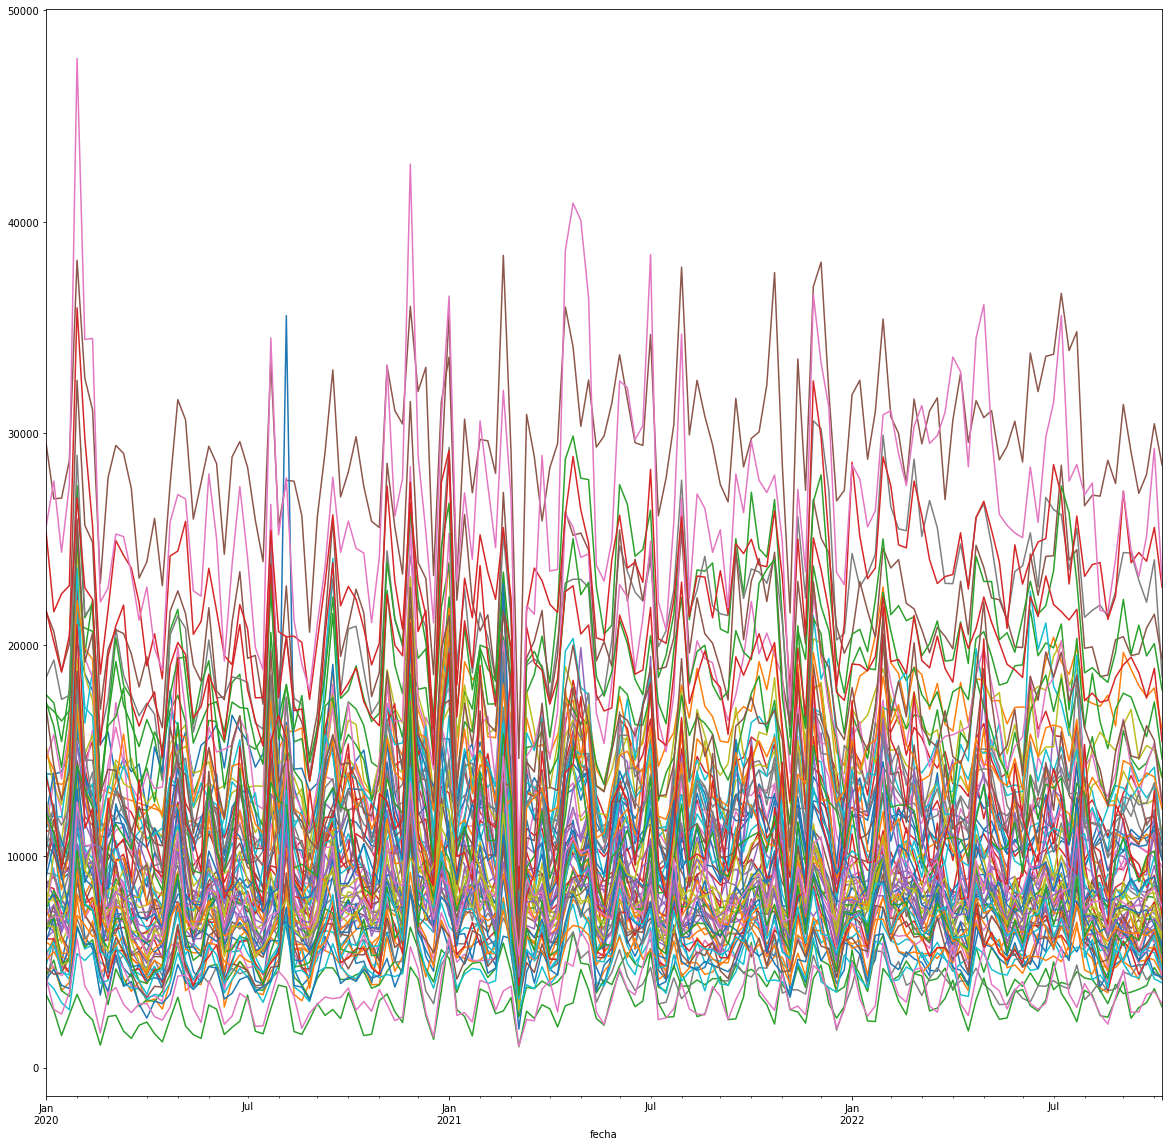

In [22]:
plt.rcParams['figure.figsize'] = (20,20)
df_55_ts['num_orders'].plot()
df_24_ts['num_orders'].plot()
df_11_ts['num_orders'].plot()
df_83_ts['num_orders'].plot()
df_32_ts['num_orders'].plot()
df_13_ts['num_orders'].plot()
df_109_ts['num_orders'].plot()
df_52_ts['num_orders'].plot()
df_93_ts['num_orders'].plot()
df_186_ts['num_orders'].plot()
df_146_ts['num_orders'].plot()
df_57_ts['num_orders'].plot()
df_149_ts['num_orders'].plot()
df_89_ts['num_orders'].plot()
df_124_ts['num_orders'].plot()
df_152_ts['num_orders'].plot()
df_97_ts['num_orders'].plot()
df_74_ts['num_orders'].plot()
df_108_ts['num_orders'].plot()
df_99_ts['num_orders'].plot()
df_66_ts['num_orders'].plot()
df_94_ts['num_orders'].plot()
df_91_ts['num_orders'].plot()
df_20_ts['num_orders'].plot()
df_34_ts['num_orders'].plot()
df_137_ts['num_orders'].plot()
df_92_ts['num_orders'].plot()
df_126_ts['num_orders'].plot()
df_36_ts['num_orders'].plot()
df_162_ts['num_orders'].plot()
df_75_ts['num_orders'].plot()
df_177_ts['num_orders'].plot()
df_27_ts['num_orders'].plot()
df_157_ts['num_orders'].plot()
df_106_ts['num_orders'].plot()
df_64_ts['num_orders'].plot()
df_129_ts['num_orders'].plot()
df_14_ts['num_orders'].plot()
df_17_ts['num_orders'].plot()
df_153_ts['num_orders'].plot()
df_139_ts['num_orders'].plot()
df_161_ts['num_orders'].plot()
df_81_ts['num_orders'].plot()
df_26_ts['num_orders'].plot()
df_73_ts['num_orders'].plot()
df_50_ts['num_orders'].plot()
df_104_ts['num_orders'].plot()
df_42_ts['num_orders'].plot()
df_113_ts['num_orders'].plot()
df_145_ts['num_orders'].plot()
df_53_ts['num_orders'].plot()
df_72_ts['num_orders'].plot()
df_67_ts['num_orders'].plot()
df_174_ts['num_orders'].plot()
df_29_ts['num_orders'].plot()
df_77_ts['num_orders'].plot()
df_41_ts['num_orders'].plot()
df_30_ts['num_orders'].plot()
df_76_ts['num_orders'].plot()
df_59_ts['num_orders'].plot()
df_88_ts['num_orders'].plot()
df_143_ts['num_orders'].plot()
df_58_ts['num_orders'].plot()
df_10_ts['num_orders'].plot()
df_101_ts['num_orders'].plot()
df_80_ts['num_orders'].plot()
df_43_ts['num_orders'].plot()
df_65_ts['num_orders'].plot()
df_39_ts['num_orders'].plot()
df_102_ts['num_orders'].plot()
df_110_ts['num_orders'].plot()
df_132_ts['num_orders'].plot()
df_23_ts['num_orders'].plot()
df_86_ts['num_orders'].plot()
df_68_ts['num_orders'].plot()
df_51_ts['num_orders'].plot()
df_61_ts['num_orders'].plot()

<AxesSubplot:xlabel='fecha'>

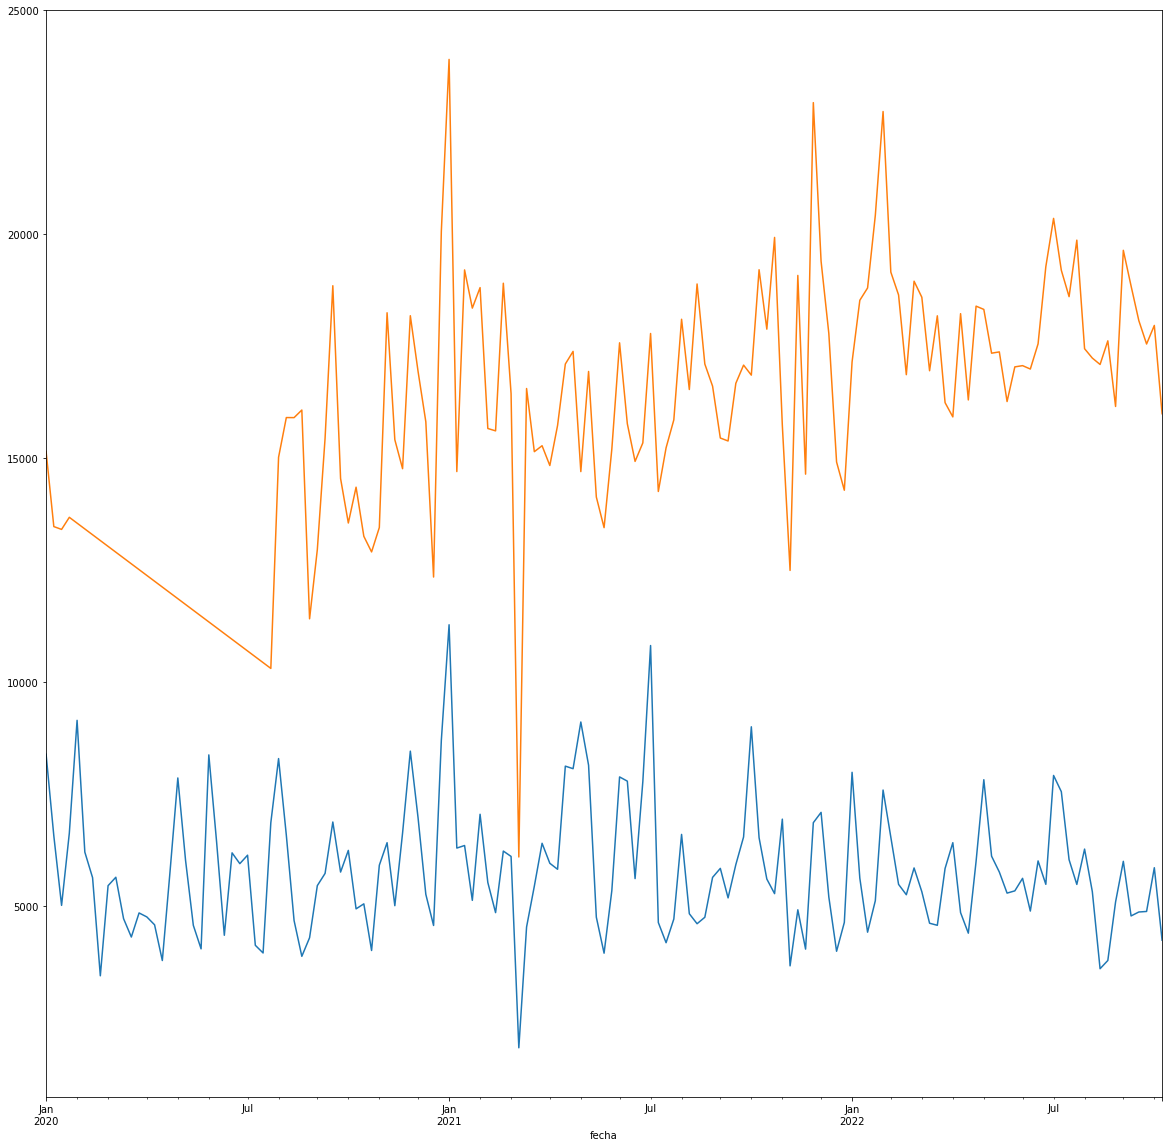

In [23]:
plt.rcParams['figure.figsize'] = (20,20)
df_55_ts['num_orders'].plot()
df_24_ts['num_orders'].plot()

In [25]:
model_55= SARIMAX(df_55_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [27]:
model_11= SARIMAX(df_11_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [28]:
model_83= SARIMAX(df_83_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [29]:
model_32= SARIMAX(df_32_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [30]:
model_13= SARIMAX(df_13_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [31]:
model_109= SARIMAX(df_109_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [32]:
odel_52= SARIMAX(df_52_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [33]:
model_93= SARIMAX(df_93_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [34]:
model_186= SARIMAX(df_186_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [35]:
model_146= SARIMAX(df_146_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [ ]:
model_55= SARIMAX(df_55_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_24= SARIMAX(df_24_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_11= SARIMAX(df_11_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_83= SARIMAX(df_83_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_32= SARIMAX(df_32_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_13= SARIMAX(df_13_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_109= SARIMAX(df_109_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_52= SARIMAX(df_52_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_93= SARIMAX(df_93_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_186= SARIMAX(df_186_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_146= SARIMAX(df_146_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_57= SARIMAX(df_57_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_149= SARIMAX(df_149_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_89= SARIMAX(df_89_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_124= SARIMAX(df_124_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_152= SARIMAX(df_152_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_97= SARIMAX(df_97_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_74= SARIMAX(df_74_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_108= SARIMAX(df_108_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_99= SARIMAX(df_99_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_66= SARIMAX(df_66_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_94= SARIMAX(df_94_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_91= SARIMAX(df_91_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_20= SARIMAX(df_20_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_34= SARIMAX(df_34_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_137= SARIMAX(df_137_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_92= SARIMAX(df_92_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_126= SARIMAX(df_126_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_36= SARIMAX(df_36_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_162= SARIMAX(df_162_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_75= SARIMAX(df_75_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_177= SARIMAX(df_177_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_27= SARIMAX(df_27_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_157= SARIMAX(df_157_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_106= SARIMAX(df_106_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_64= SARIMAX(df_64_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_129= SARIMAX(df_129_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_14= SARIMAX(df_14_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_17= SARIMAX(df_17_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_153= SARIMAX(df_153_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_139= SARIMAX(df_139_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_161= SARIMAX(df_161_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_81= SARIMAX(df_81_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_26= SARIMAX(df_26_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_73= SARIMAX(df_73_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_50= SARIMAX(df_50_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_104= SARIMAX(df_104_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_42= SARIMAX(df_42_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_113= SARIMAX(df_113_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_145= SARIMAX(df_145_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_53= SARIMAX(df_53_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_72= SARIMAX(df_72_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_67= SARIMAX(df_67_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_174= SARIMAX(df_174_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_29= SARIMAX(df_29_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_77= SARIMAX(df_77_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_41= SARIMAX(df_41_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_30= SARIMAX(df_30_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_76= SARIMAX(df_76_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_59= SARIMAX(df_59_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_88= SARIMAX(df_88_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_143= SARIMAX(df_143_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_58= SARIMAX(df_58_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_10= SARIMAX(df_10_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_101= SARIMAX(df_101_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_80= SARIMAX(df_80_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_43= SARIMAX(df_43_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_65= SARIMAX(df_65_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_39= SARIMAX(df_39_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_102= SARIMAX(df_102_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_110= SARIMAX(df_110_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_132= SARIMAX(df_132_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_23= SARIMAX(df_23_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_86= SARIMAX(df_86_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_68= SARIMAX(df_68_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_51= SARIMAX(df_51_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')
model_61= SARIMAX(df_61_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

In [36]:
results_55 = model_55.fit(maxiter=100)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16081D+00    |proj g|=  1.72535D-01

At iterate    5    f=  8.09134D+00    |proj g|=  1.55784D-02

At iterate   10    f=  8.08663D+00    |proj g|=  1.46031D-02

At iterate   15    f=  8.08500D+00    |proj g|=  8.50866D-04

At iterate   20    f=  8.08490D+00    |proj g|=  7.40894D-04

At iterate   25    f=  8.08488D+00    |proj g|=  8.09816D-04

At iterate   30    f=  8.08290D+00    |proj g|=  8.32529D-03

At iterate   35    f=  8.04850D+00    |proj g|=  7.07969D-02

At iterate   40    f=  8.00194D+00    |proj g|=  2.95201D-02

At iterate   45    f=  7.98619D+00    |proj g|=  1.06115D-01

At iterate   50    f=  7.96323D+00    |proj g|=  5.81974D-03

At iterate   55    f=  7.96292D+00    |proj g|=  7.64300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

In [37]:
predictions_55  = pd.DataFrame(results_55.get_prediction(start='2022-10-17', end='2022-11-07').predicted_mean)

In [38]:
predictions_55['week'] = [146,147,148,149]

In [39]:
predictions_55

,predicted_mean,week
2022-10-17,4300.835,146
2022-10-24,5178.978,147
2022-10-31,5968.272,148
2022-11-07,6109.792,149


In [40]:
predictions_55['center_id'] = 55

In [41]:
predictions_55 = predictions_55.reset_index()

In [42]:
predictions_55 = predictions_55[['center_id','week', 'predicted_mean']]

In [43]:
predictions_55.columns = ['center_id','week', 'prediction']

In [44]:
predictions_55

,center_id,week,prediction
0,55,146,4300.835
1,55,147,5178.978
2,55,148,5968.272
3,55,149,6109.792


In [53]:
results_11= model_11.fit(maxiter=100)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75821D+00    |proj g|=  1.13890D-01


 This problem is unconstrained.



At iterate    5    f=  8.73986D+00    |proj g|=  2.99766D-03

At iterate   10    f=  8.73969D+00    |proj g|=  6.13272D-04

At iterate   15    f=  8.73954D+00    |proj g|=  7.94591D-03

At iterate   20    f=  8.73918D+00    |proj g|=  8.09270D-04

At iterate   25    f=  8.73918D+00    |proj g|=  8.27159D-05

At iterate   30    f=  8.73916D+00    |proj g|=  1.29197D-03

At iterate   35    f=  8.73886D+00    |proj g|=  1.03674D-02

At iterate   40    f=  8.73723D+00    |proj g|=  1.16779D-02

At iterate   45    f=  8.73573D+00    |proj g|=  1.16995D-03

At iterate   50    f=  8.73570D+00    |proj g|=  8.08214D-05

At iterate   55    f=  8.73569D+00    |proj g|=  2.39091D-04

At iterate   60    f=  8.73564D+00    |proj g|=  1.15161D-03

At iterate   65    f=  8.73404D+00    |proj g|=  2.37502D-02

At iterate   70    f=  8.71146D+00    |proj g|=  3.35191D-02

At iterate   75    f=  8.69691D+00    |proj g|=  3.14292D-02

At iterate   80    f=  8.69503D+00    |proj g|=  1.44577D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [54]:
predictions_11  = pd.DataFrame(results_11.get_prediction(start='2022-10-17', end='2022-11-07').predicted_mean)                     
                            

In [55]:
predictions_11['week'] = [146,147,148,149]
predictions_11['center_id'] = 11
predictions_11 = predictions_11.reset_index()
predictions_11 = predictions_11[['center_id','week', 'predicted_mean']]
predictions_11.columns = ['center_id','week', 'prediction']
predictions_11

,center_id,week,prediction
0,11,146,16201.356
1,11,147,15033.270
2,11,148,16469.565
3,11,149,16841.637


In [64]:
results_83= model_83.fit(maxiter=100)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48391D+00    |proj g|=  3.01469D-01

At iterate    5    f=  8.33586D+00    |proj g|=  1.20221D-02

At iterate   10    f=  8.33532D+00    |proj g|=  6.76930D-04

At iterate   15    f=  8.33530D+00    |proj g|=  7.46992D-04

At iterate   20    f=  8.33503D+00    |proj g|=  8.62627D-03

At iterate   25    f=  8.33385D+00    |proj g|=  2.27304D-03

At iterate   30    f=  8.33310D+00    |proj g|=  1.63343D-03

At iterate   35    f=  8.33307D+00    |proj g|=  1.00689D-03

At iterate   40    f=  8.33282D+00    |proj g|=  3.70697D-03

At iterate   45    f=  8.33268D+00    |proj g|=  3.43312D-04

At iterate   50    f=  8.33268D+00    |proj g|=  3.96229D-04

At iterate   55    f=  8.33246D+00    |proj g|=  4.69257D-03

At iterate   60    f=  8.33070D+00    |proj g|=  8.41005D-03

At iterate   65    f=  8.3

In [65]:
predictions_83  = pd.DataFrame(results_83.get_prediction(start='2022-10-17', end='2022-11-07').predicted_mean)                     


In [66]:
predictions_83['week'] = [146,147,148,149]
predictions_83['center_id'] = 83
predictions_83 = predictions_83.reset_index()
predictions_83 = predictions_83[['center_id','week', 'predicted_mean']]
predictions_83.columns = ['center_id','week', 'prediction']
predictions_83

,center_id,week,prediction
0,83,146,10507.114
1,83,147,10058.486
2,83,148,10302.825
3,83,149,10874.864


In [67]:
model_32= SARIMAX(df_32_ts,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [69]:
results_32= model_32.fit(maxiter=100)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98563D+00    |proj g|=  6.85372D-02


 This problem is unconstrained.



At iterate    5    f=  7.96832D+00    |proj g|=  1.69018D-02

At iterate   10    f=  7.96682D+00    |proj g|=  4.88821D-03

At iterate   15    f=  7.96652D+00    |proj g|=  9.42571D-04

At iterate   20    f=  7.96651D+00    |proj g|=  4.36981D-04

At iterate   25    f=  7.96636D+00    |proj g|=  4.43292D-03

At iterate   30    f=  7.96599D+00    |proj g|=  4.07902D-03

At iterate   35    f=  7.96498D+00    |proj g|=  2.04135D-02

At iterate   40    f=  7.96287D+00    |proj g|=  4.98409D-03

At iterate   45    f=  7.96087D+00    |proj g|=  1.43090D-02

At iterate   50    f=  7.92030D+00    |proj g|=  5.76733D-02

At iterate   55    f=  7.91616D+00    |proj g|=  4.98877D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   60    f=  7.91485D+00    |proj g|=  1.53514D-03

At iterate   65    f=  7.91482D+00    |proj g|=  2.04109D-03

At iterate   70    f=  7.91480D+00    |proj g|=  3.36949D-03

At iterate   75    f=  7.91472D+00    |proj g|=  1.49675D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   80    f=  7.91470D+00    |proj g|=  2.65365D-04

At iterate   85    f=  7.91469D+00    |proj g|=  1.08964D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     88    164      3     0     0   6.866D-04   7.915D+00
  F =   7.9146854632662595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [70]:
predictions_32  = pd.DataFrame(results_32.get_prediction(start='2022-10-17', end='2022-11-07').predicted_mean)                     


In [71]:
predictions_32['week'] = [146,147,148,149]
predictions_32['center_id'] = 32
predictions_32 = predictions_32.reset_index()
predictions_32 = predictions_32[['center_id','week', 'predicted_mean']]
predictions_32.columns = ['center_id','week', 'prediction']
predictions_32

,center_id,week,prediction
0,32,146,8831.165
1,32,147,8879.181
2,32,148,8702.385
3,32,149,9187.082


In [72]:
total_predictions = predictions_55.copy()

In [73]:
total_predictions

,center_id,week,prediction
0,55,146,4300.835
1,55,147,5178.978
2,55,148,5968.272
3,55,149,6109.792


In [76]:
total_predictions = pd.concat([total_predictions, predictions_11])

In [77]:
total_predictions

,center_id,week,prediction
0,55,146,4300.835
1,55,147,5178.978
2,55,148,5968.272
3,55,149,6109.792
0,11,146,16201.356
1,11,147,15033.270
2,11,148,16469.565
3,11,149,16841.637


In [78]:
total_predictions = pd.concat([total_predictions, predictions_83])

In [79]:
total_predictions = pd.concat([total_predictions, predictions_32])

In [80]:
total_predictions

,center_id,week,prediction
0,55,146,4300.835
1,55,147,5178.978
2,55,148,5968.272
3,55,149,6109.792
0,11,146,16201.356
1,11,147,15033.270
2,11,148,16469.565
3,11,149,16841.637
0,83,146,10507.114
1,83,147,10058.486


In [83]:
json_prediction = total_predictions.to_json(orient='records')
with open('predictions.json', 'w') as outfile:
    outfile.write(json_prediction)

In [84]:
print(json_prediction)

[{"center_id":55,"week":146,"prediction":4300.8350410906},{"center_id":55,"week":147,"prediction":5178.9778986435},{"center_id":55,"week":148,"prediction":5968.2721800734},{"center_id":55,"week":149,"prediction":6109.7923700396},{"center_id":11,"week":146,"prediction":16201.3558378934},{"center_id":11,"week":147,"prediction":15033.2704513584},{"center_id":11,"week":148,"prediction":16469.5649327175},{"center_id":11,"week":149,"prediction":16841.6373683865},{"center_id":83,"week":146,"prediction":10507.1139741296},{"center_id":83,"week":147,"prediction":10058.4857417167},{"center_id":83,"week":148,"prediction":10302.824898483},{"center_id":83,"week":149,"prediction":10874.8642024257},{"center_id":32,"week":146,"prediction":8831.1645062767},{"center_id":32,"week":147,"prediction":8879.1806065073},{"center_id":32,"week":148,"prediction":8702.3848390183},{"center_id":32,"week":149,"prediction":9187.0822518355}]


In [91]:
old_55 = df_55_ts.tail(4)

In [92]:
old_55['Week'] = [142,143,144,145]

/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_1428/2114770662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_55['Week'] = [142,143,144,145]


In [95]:
old_55.reset_index()

,fecha,num_orders,Week
0,2022-09-19,4857,142
1,2022-09-26,4869,143
2,2022-10-03,5846,144
3,2022-10-10,4227,145
